## Assignment No. 6

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pathlib

In [2]:
Image_Shape = (224,224)
URL_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=URL_dataset,fname='flower_photos',untar=True)
data_dir = pathlib.Path(data_dir)
# Total images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [3]:
#Making the different classes
flowers_images_dict = {
"daisy" : list(data_dir.glob('daisy/*')),
"dandelion" : list(data_dir.glob('dandelion/*')),
"roses" : list(data_dir.glob('roses/*')),
"sunflowers" : list(data_dir.glob('sunflowers/*')),
"tulips" : list(data_dir.glob('tulips/*'))
}
flowers_labels_dict= {
"daisy" : 0,
"dandelion" : 1,
"roses" : 2,
"sunflowers" : 3,
"tulips" : 4
}

In [4]:
#Reshaping Images
X, Y = [],[]
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, Image_Shape)
    X.append(resized_img)
    Y.append(flowers_labels_dict[flower_name])
X = np.array(X)
y = np.array(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [5]:
#Pretrained Model
tf_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
classifier = tf.keras.Sequential([
hub.KerasLayer(tf_model,input_shape=(224,224,3), trainable=False),
tf.keras.layers.Dense(len(flowers_labels_dict), activation="softmax")
])
classifier.summary()
classifier.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=["accuracy"]
)
classifier.fit(X_train_scaled, y_train,epochs=5)
classifier.evaluate(X_test_scaled, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 50s 550ms/step - loss: 0.8216 - accuracy: 0.6860
Epoch 2/5
86/86 [==============================] - 47s 543ms/step - loss: 0.4127 - accuracy: 0.8619
Epoch 3/5
86/86 [==============================] - 47s 545ms/step - loss: 0.3221 - accuracy: 0.8895
Epoch 4/5
86/86 [==============================] - 49s 571ms/step - loss: 0.2721 - accuracy: 0.9175
Epoch 5/5
29/29 [==============================] - 17s 551ms/step - loss: 0.3673 - accuracy: 0.8715


[0.3672952950000763, 0.8714597225189209]

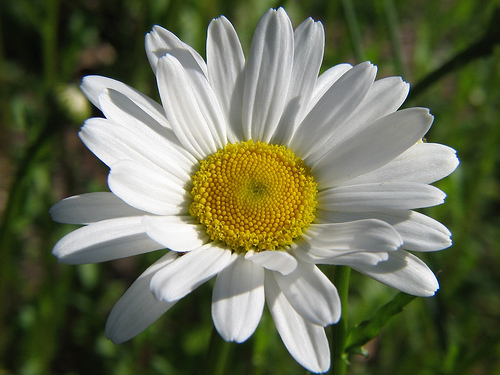

In [6]:
#Prediction
from PIL import Image
img = Image.open("488202750_c420cbce61.jpg")
img

In [7]:
img = tf.keras.preprocessing.image.img_to_array(img.resize(Image_Shape))
img = np.array([img])
res = classifier.predict(img)
print("The prediction is : {}".format(list(flowers_labels_dict.keys())[np.argmax(res)]))

1/1 [==============================] - 0s 390ms/step
The prediction is : daisy
